### Importation des librairies nécessaire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Chargement des données

In [2]:
train_df = pd.read_csv("../data/raw/customer_churn_dataset_training.csv")
test_df = pd.read_csv("../data/raw/customer_churn_dataset-testing.csv")

# Concatenation des deux datasets
df = pd.concat([train_df, test_df], axis=0)

df.to_csv('../data/raw/churn.csv', index=False)

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


#### Compréhension du dataset

In [3]:
df.shape

(505207, 12)

In [4]:
print(df.columns)
# Ici on aura pas besoin de la collone 'CustomerID'
df.drop(columns=['CustomerID'], inplace=True)  

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                505206 non-null  float64
 1   Gender             505206 non-null  object 
 2   Tenure             505206 non-null  float64
 3   Usage Frequency    505206 non-null  float64
 4   Support Calls      505206 non-null  float64
 5   Payment Delay      505206 non-null  float64
 6   Subscription Type  505206 non-null  object 
 7   Contract Length    505206 non-null  object 
 8   Total Spend        505206 non-null  float64
 9   Last Interaction   505206 non-null  float64
 10  Churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


In [10]:
df.describe(include="all")

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,505206.000000,505206,505206.000000,505206.000000,505206.000000,505206.000000,505206,505206,505206.000000,505206.000000,505206.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,Standard,Annual,NaN,NaN,NaN
freq,NaN,280273,NaN,NaN,NaN,NaN,170630,198608,NaN,NaN,NaN
mean,39.704172,NaN,31.350435,15.714825,3.833317,13.496843,NaN,NaN,620.072766,14.610581,0.555203
std,12.670577,NaN,17.237482,8.619323,3.133603,8.451187,NaN,NaN,245.319256,8.608286,0.496944
min,18.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,100.000000,1.000000,0.000000
25%,29.000000,NaN,16.000000,8.000000,1.000000,6.000000,NaN,NaN,446.000000,7.000000,0.000000
50%,40.000000,NaN,32.000000,16.000000,3.000000,13.000000,NaN,NaN,648.900000,14.000000,1.000000
75%,49.000000,NaN,46.000000,23.000000,6.000000,20.000000,NaN,NaN,824.000000,22.000000,1.000000


In [13]:
df.dropna()
# Les valeurs uniques des variables catégorielles
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
Subscription Type: ['Standard' 'Basic' 'Premium']
Contract Length: ['Annual' 'Monthly' 'Quarterly']


In [8]:
# Nombre de valeurs uniques par colonne de type float64
for col in df.select_dtypes(include=["float64"]).columns:
    print(f"{col}: {len(df[col].unique())}")

Age: 49
Tenure: 61
Usage Frequency: 31
Support Calls: 12
Payment Delay: 32
Total Spend: 68364
Last Interaction: 31
Churn: 3


In [12]:
print(f"Nombre total de valeurs manquantes: {df.isnull().sum().sum()}")

# Afficher le nombre de valeurs manquantes par colonne
print("\nNombre de valeurs manquantes par colonne:")
print(f"{df.isnull().sum()}")

# Afficher les lignes avec des valeurs manquantes
print("\nLignes avec des valeurs manquantes:")
display(df[df.isna().any(axis=1)])

# Puisque nous avons qu'une seule ligne avec des valeurs manquantes, nous la supprimons
df = df.dropna()

Nombre total de valeurs manquantes: 0

Nombre de valeurs manquantes par colonne:
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Lignes avec des valeurs manquantes:


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [24]:
# Afficher les lignes avec des valeurs manquantes
print("\nLignes avec des valeurs manquantes:")
display(df[df.isna().any(axis=1)])


Lignes avec des valeurs manquantes:


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(f"Nombre de doublons: {df.duplicated().sum()}")
# Aucun doublon détecté

Nombre de doublons: 0


In [11]:
# Analyse de la proportion de 'Churn' (notre classe cible)
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Taux de départ Churn : {churn_rate[1]:.2f}%")
print(f"Taux de rétention : {churn_rate[0]:.2f}%")

# On remarque que la moyenne de 'Churn' est de 0.5552. Cela signifie que ~56% des clients partent
# C'est inhabituel et énorme

Taux de départ Churn : 55.52%
Taux de rétention : 44.48%


In [12]:
# Séparation automatique des colonnes numériques et catégorielles pour facilité le pré-traitement par la suite
numerical_cols = df.select_dtypes(include=['float64']).columns.drop('Churn')
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Variables numériques : {list(numerical_cols)}")
print(f"Variables catégorielles : {list(categorical_cols)}")

Variables numériques : ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
Variables catégorielles : ['Gender', 'Subscription Type', 'Contract Length']


In [13]:
# Détection des Outliers 

# Calcule global des bornes (Q1, Q2, Q3) pour toutes les colonnes d'un coup
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

mask_outliers = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))

print("Nombre d'outliers détectés par variable :")
print(mask_outliers.sum().sort_values(ascending=False))

# Pas d'outliers

Nombre d'outliers détectés par variable :
Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
dtype: int64


### Pré-Visualisation des données

In [ ]:
# Vérification des corrélations linéaire avec le 'Churn'
correlation = df[numerical_cols].corrwith(df['Churn']).sort_values(ascending=False)
print("Corrélation avec le 'Churn':\n", correlation)

Corrélation avec le 'Churn':
 Support Calls       0.516283
Payment Delay       0.329785
Age                 0.191224
Last Interaction    0.127150
Tenure             -0.021308
Usage Frequency    -0.053263
Total Spend        -0.369682
dtype: float64


### Visualisation des données

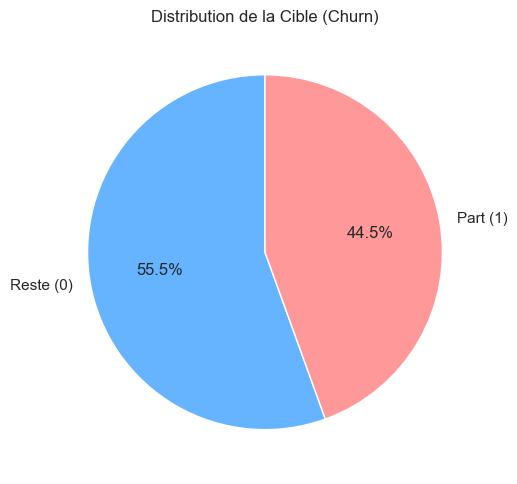

In [15]:
# Configuration du style global
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# --- GRAPHIQUE 1 : Distribution du Churn (Pie Chart) ---
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=['Reste (0)', 'Part (1)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution de la Cible (Churn)')

plt.tight_layout()
plt.show()

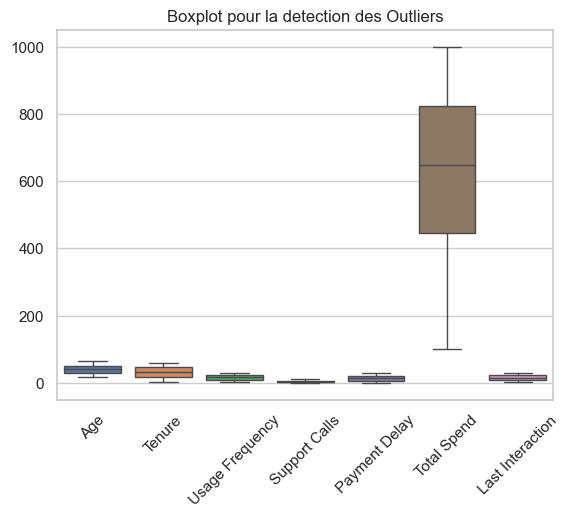

In [16]:
# --- GRAPHIQUE 2 : Détection des Outliers (Boxplot) ---
sns.boxplot(data=df[numerical_cols])

plt.title("Boxplot pour la detection des Outliers")
plt.xticks(rotation=45)
plt.show()

# On remarque l'absence d'outliers extrême, mais qu'il y a une hétérogéniété des échelles

### Bivariée

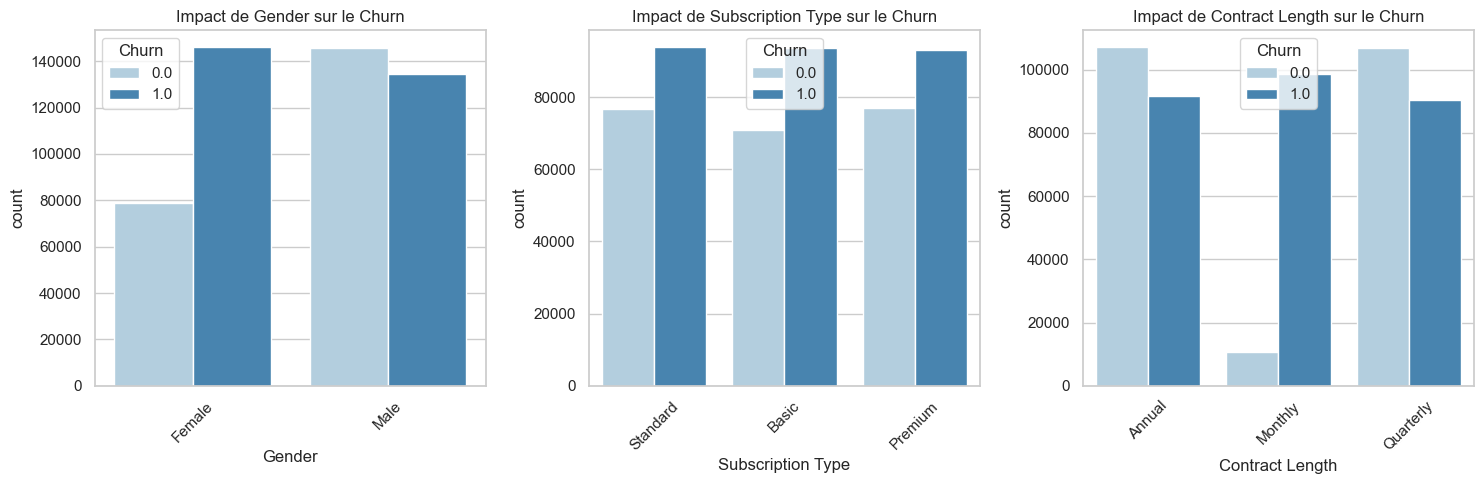

In [17]:
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.countplot(data=df, x=col, hue='Churn', palette="Blues")
    plt.title(f'Impact de {col} sur le Churn')
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

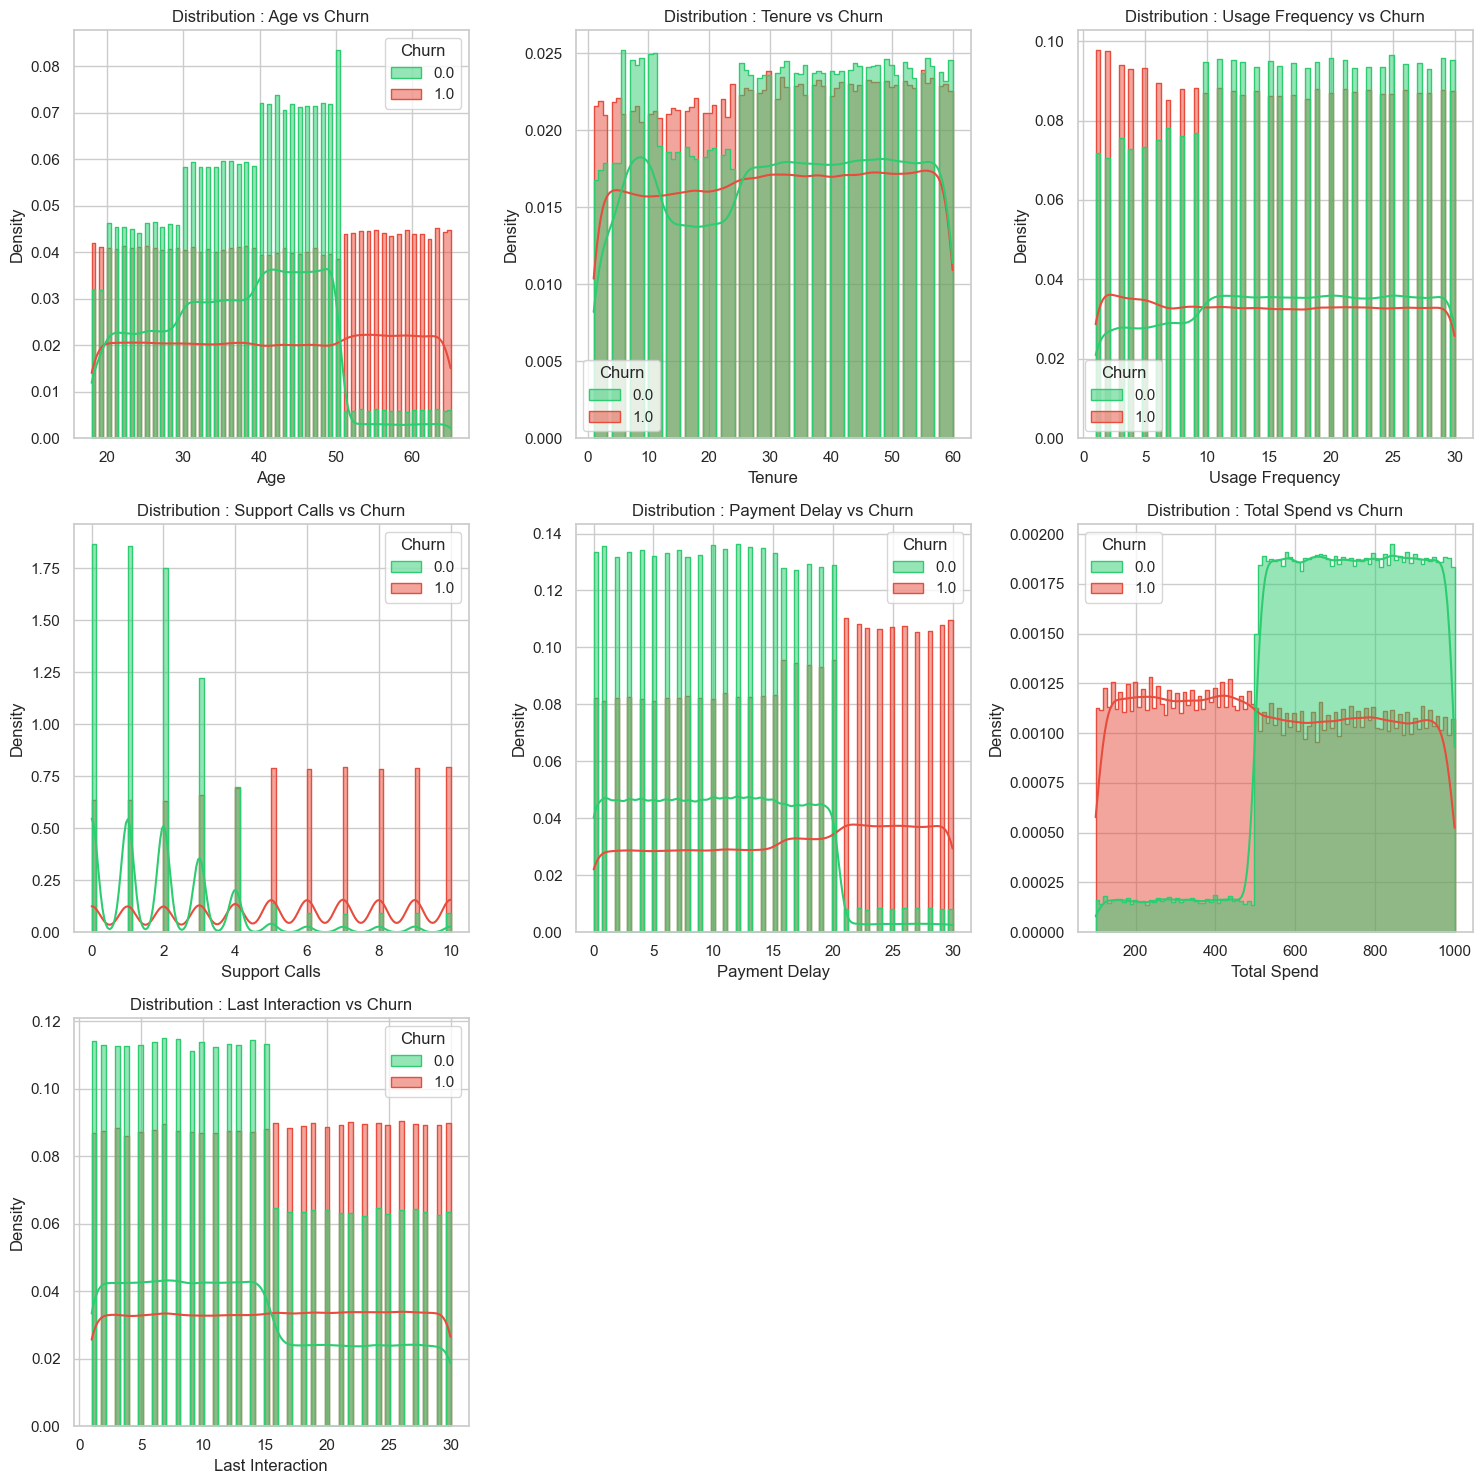

In [18]:
cols_to_plot = [c for c in numerical_cols if c != 'Churn']
n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

custom_palette = {0: "#2ecc71", 1: "#e74c3c"} 

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=df, x=col, hue='Churn', kde=True, 
                 element="step", stat="density", common_norm=False,
                 palette=custom_palette, alpha=0.5) 
                 
    plt.title(f'Distribution : {col} vs Churn')

plt.tight_layout()
plt.show()

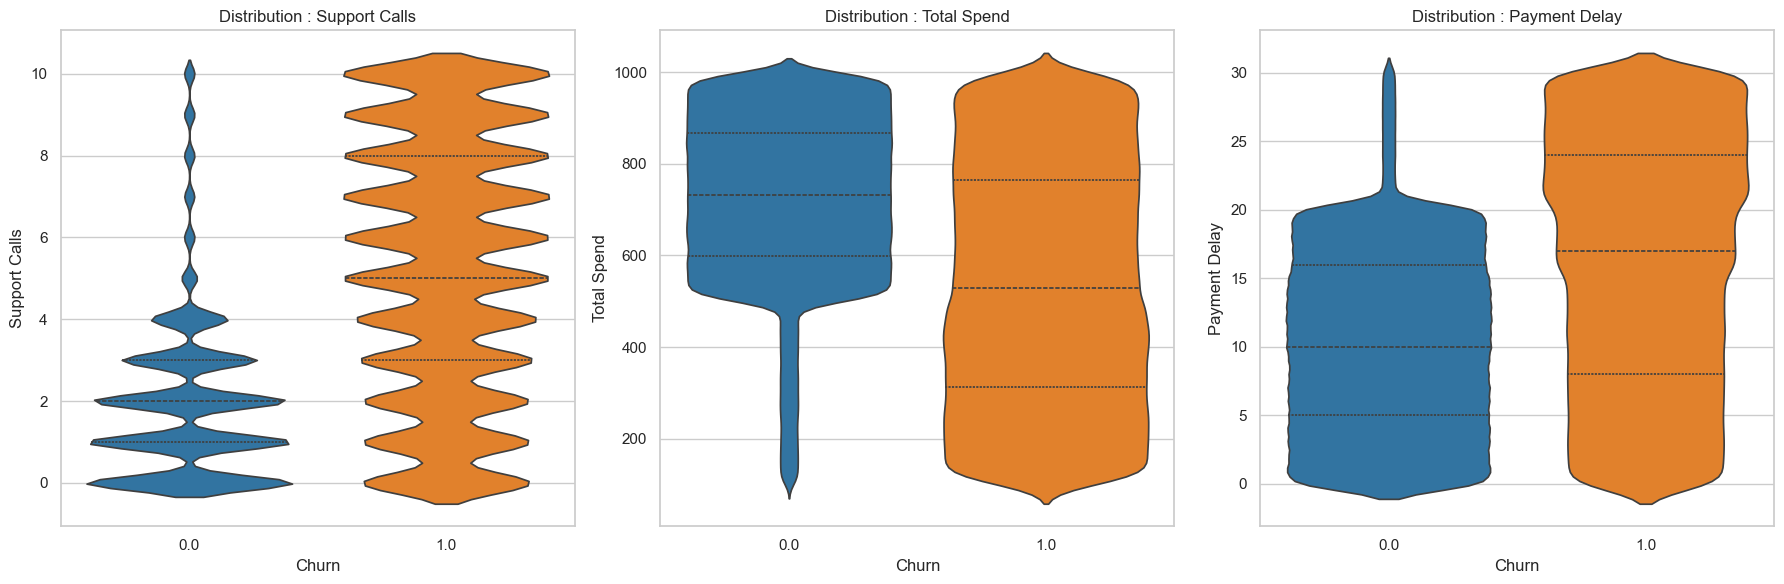

In [19]:
# Sélection des variables les plus importantes identifiées 
important_cols = ['Support Calls', 'Total Spend', 'Payment Delay']

plt.figure(figsize=(18, 6))

pro_palette = {
    0: "#1f77b4", 1: "#ff7f0e",       
    0.0: "#1f77b4", 1.0: "#ff7f0e",   
    "0": "#1f77b4", "1": "#ff7f0e"    
}

# 3. Affichage
for i, col in enumerate(important_cols, 1):
    plt.subplot(1, 3, i)
    
    sns.violinplot(
        x='Churn', 
        y=col, 
        data=df, 
        palette=pro_palette, 
        inner="quart", 
        hue='Churn',      
        legend=False      
    )
    
    plt.title(f'Distribution : {col}', fontsize=12)

plt.tight_layout()
plt.show()

### Multivariée

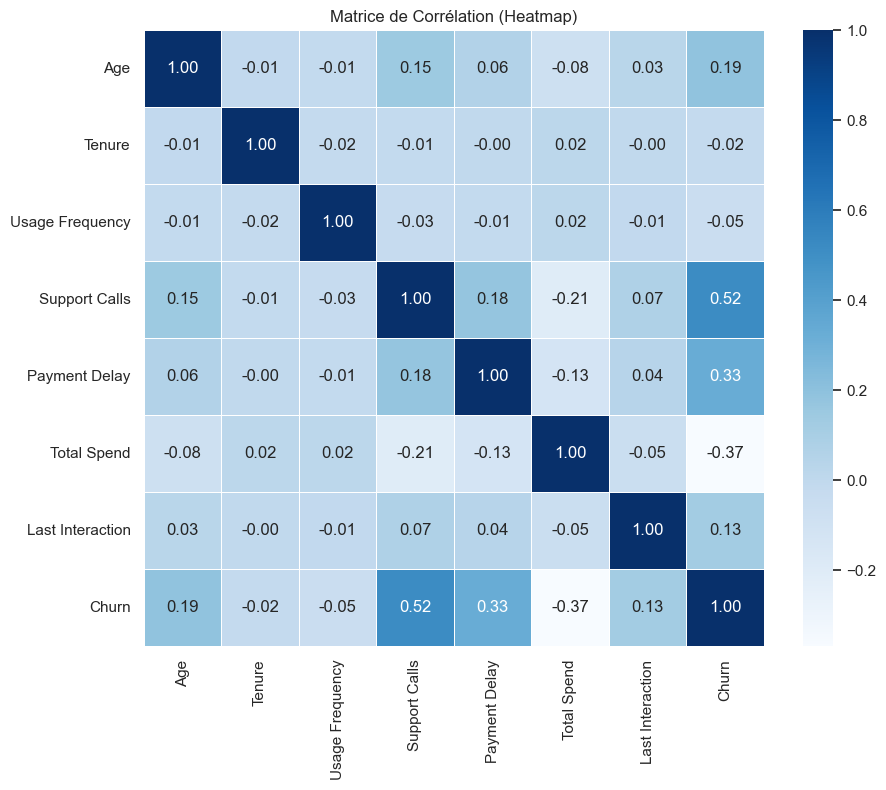

In [20]:
# --- GRAPHIQUE 4 : La Heatmap de Corrélation ---
plt.figure(figsize=(10, 8))
# On ne prend que les colonnes numériques
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation (Heatmap)')
plt.show()

In [21]:
df.to_csv('../data/raw/churn.csv', index=False)